In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
x_train, x_text,y_train,y_test= train_test_split(df.drop(columns=['target']), df['target'], test_size=.20, random_state=42)

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
x_train['training_hours_after']=x_train['training_hours']
x_text['training_hours_after']=x_text['training_hours']

In [11]:
x_train['training_hours_after'].isnull().sum()

589

In [18]:
x_train['training_hours_after'][x_train['training_hours_after'].isnull()]=x_train['training_hours'].dropna().sample(x_train['training_hours'].isnull().sum()).values
x_train['training_hours_after'][x_train['training_hours_after'].isnull()]=x_train['training_hours'].dropna().sample(x_train['training_hours'].isnull().sum()).values

C:\Users\mahed\AppData\Local\Temp\ipykernel_4676\2776020049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['training_hours_after'][x_train['training_hours_after'].isnull()]=x_train['training_hours'].dropna().sample(x_train['training_hours'].isnull().sum()).values
C:\Users\mahed\AppData\Local\Temp\ipykernel_4676\2776020049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['training_hours_after'][x_train['training_hours_after'].isnull()]=x_train['training_hours'].dropna().sample(x_train['training_hours'].isnull().sum()).values


ValueError: cannot set using a list-like indexer with a different length than the value

In [17]:
x_train['training_hours'].dropna().sample(x_train['training_hours'].isnull().sum()).values

array([ 99.,  50.,  78.,  98.,  26.,  20.,  66.,  75.,  89.,  35., 148.,
        56.,   7.,  32.,  14.,  23.,  42.,  31.,  20.,  86.,  72., 210.,
       104., 202.,  14.,  28.,  32., 112.,   4.,  14., 154.,  21., 134.,
        41., 246., 322.,   9.,  18.,  12.,  28.,  14.,  22.,  65.,  49.,
       125.,  17.,   6., 138., 116.,  99.,  27.,  13.,  89., 112.,  31.,
       109.,  25.,  33.,  34.,  56.,   4.,  64.,  83.,  13.,   5.,  13.,
       276.,  19.,  62.,   2.,  56.,  14.,  25.,   6.,  99.,  45.,  24.,
        46.,  15., 145.,  39.,  96.,  80.,   3.,  64.,  19.,  11.,  44.,
        98., 105.,  12.,  43.,  37., 100.,  46.,  57., 152., 204.,  50.,
       210., 138., 168.,  37.,  70.,  25.,   9.,  30.,  47.,  38., 182.,
       256.,  14.,   9., 100.,  28.,   6.,  98.,   4.,  11., 198., 226.,
        39.,  70.,   4., 170.,  74.,  24., 328.,  30.,  48., 170.,  25.,
        48.,  53., 128.,   4.,  36.,  32.,  19.,  45.,  51.,  14.,  37.,
        22., 190.,  24.,  15.,   3.,  66., 214., 15

In [20]:
x_train['training_hours_after'].isnull().sum()

0

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


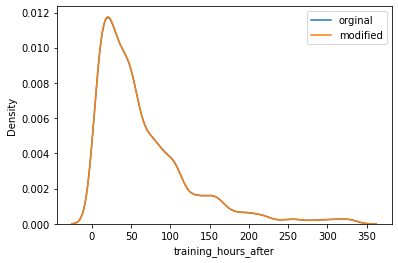

In [23]:
sns.distplot(x_train['training_hours'], label='orginal',hist=False)
sns.distplot(x_train['training_hours_after'], label='modified', hist=False)

plt.legend()
plt.show()

In [24]:
print('original :', x_train['training_hours'].var())
print('modified :', x_train['training_hours_after'].var())

original : 3583.246418299249
modified : 3581.302186366579


<AxesSubplot: >

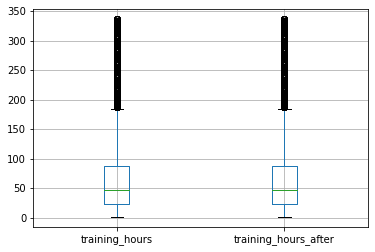

In [25]:
x_train[['training_hours', 'training_hours_after']].boxplot()